In [201]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score

from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('https://media.githubusercontent.com/media/nursnaaz/DataScienceMasterclass/main/07%20-%20Polynomial%20Regression/data_poly.csv')

In [6]:
data

,x,y
0,0,3
1,1,4
2,2,5
3,3,7
4,4,10
5,5,8
6,6,9
7,7,10
8,8,10
9,9,23


<Axes: xlabel='x', ylabel='y'>

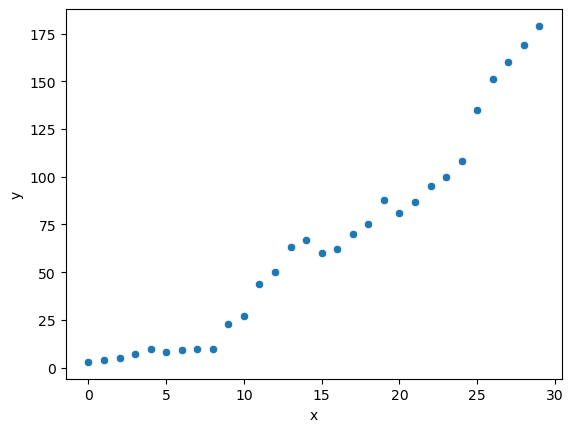

In [10]:
sns.scatterplot(x = 'x', y = 'y', data = data)

In [16]:
model = LinearRegression()
model.fit(data[['x']], data['y'])

LinearRegression()

In [18]:
data_pred = model.predict(data[['x']])

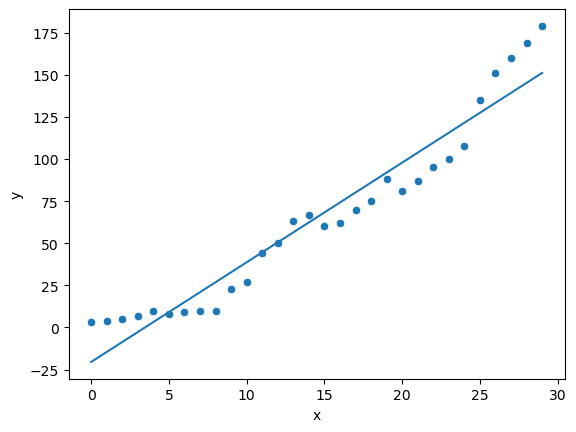

In [22]:
sns.scatterplot(x = 'x', y = 'y', data = data)
plt.plot(data_pred)

In [187]:
r2_score(data['y'], data_pred)

0.9316557748545744

In [ ]:
#x , y

#x^0, + x^1, x^2 



x, z , y



x, x^2, z, z^2, xz, xz^2, x^2z

In [165]:
poly = PolynomialFeatures(degree=2, include_bias=False, )
poly1 = PolynomialFeatures(degree=3, include_bias=False,)
poly2 = PolynomialFeatures(degree=4, include_bias=False, )
poly3 = PolynomialFeatures(degree=5, include_bias=False, )



In [167]:
poly_x = poly.fit_transform(data[['x']])
poly_x1 = poly1.fit_transform(data[['x']])
poly_x2= poly2.fit_transform(data[['x']])
poly_x3 = poly3.fit_transform(data[['x']])

In [169]:
model = LinearRegression()
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

In [171]:
model.fit(poly_x, data['y'])
model1.fit(poly_x1, data['y'])
model2.fit(poly_x2, data['y'])
model3.fit(poly_x3, data['y'])

LinearRegression()

In [173]:
data_pred_poly = model.predict(poly_x)
data_pred_poly1 = model1.predict(poly_x1)
data_pred_poly2 = model2.predict(poly_x2)
data_pred_poly3 = model3.predict(poly_x3)

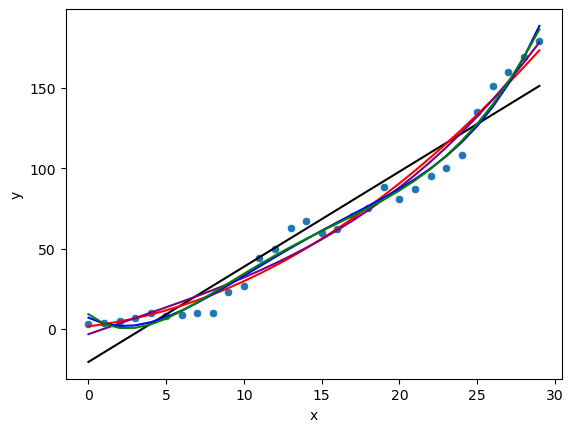

In [175]:
sns.scatterplot(x = 'x', y = 'y', data = data)
plt.plot(data_pred, color = 'black')
plt.plot(data_pred_poly, color = 'red')
plt.plot(data_pred_poly1, color = 'purple')
plt.plot(data_pred_poly2, color = 'blue')
plt.plot(data_pred_poly3, color = 'green')
plt.savefig('poly_plot_compare.png',)

In [189]:
r2_score(data['y'], data_pred_poly)

0.9742355121173141

In [191]:
r2_score(data['y'], data_pred_poly1)

0.9760588291456355

In [193]:
r2_score(data['y'], data_pred_poly2)

0.9841567128747183

In [195]:
r2_score(data['y'], data_pred_poly3)

0.9845777073755907

In [ ]:
R2 of Simple Linear Regression = 93%
R2 of Polynomial with degree 2  = 97%

In [199]:
((97 - 93)/97)*100

4.123711340206185

In [ ]:
4% percentage improvement of R2

In [265]:
train_X, test_X, train_y, test_y = train_test_split(data[['x']], data['y'], test_size=0.45, random_state=12)

In [267]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((16, 1), (14, 1), (16,), (14,))

In [269]:
train = pd.concat([train_X.reset_index().drop(columns = 'index'),train_y.reset_index().drop(columns = 'index')], axis = 1)
test = pd.concat([test_X.reset_index().drop(columns = 'index'),test_y.reset_index().drop(columns = 'index')], axis = 1)

<Axes: xlabel='x', ylabel='y'>

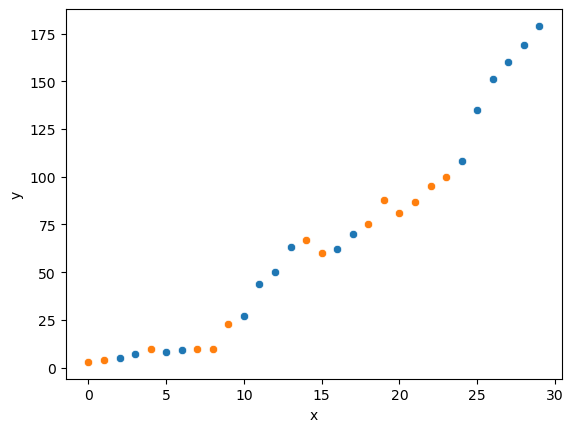

In [271]:
sns.scatterplot(x = 'x', y = 'y', data = train)
sns.scatterplot(x = 'x', y = 'y', data = test)

In [273]:
def model_run(model, train_X, test_X, train_y, test_y):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    r2_train = r2_score(train_pred, train_y)
    r2_test = r2_score(test_pred, test_y)
    return r2_train, r2_test
    

train_score = []
test_score = []
for i in range(1,10):
    if i == 1:
        model = LinearRegression()
        r2_train, r2_test = model_run(model, train_X, test_X, train_y, test_y)
        train_score.append(r2_train)
        test_score.append(r2_test)
    else:
        poly = PolynomialFeatures(degree=i, include_bias=False)
        poly_feature_train_x = poly.fit_transform(train_X)
        poly_feature_test_x = poly.transform(test_X)
        model = LinearRegression()
        r2_train, r2_test = model_run(model, poly_feature_train_x, poly_feature_test_x, train_y, test_y)
        train_score.append(r2_train)
        test_score.append(r2_test)
        

In [275]:
train_score

[0.9608469647185197,
 0.9846269322991791,
 0.9866139462466631,
 0.9888503610308056,
 0.9924318191559547,
 0.9956757729092035,
 0.9965495299068245,
 0.9980069515439354,
 0.9980506963227749]

In [277]:
test_score

[0.8658149292743589,
 0.9337436437600954,
 0.9337788028661052,
 0.9553799364415669,
 0.8089019665693018,
 0.9518766198100143,
 0.7315078846264371,
 0.5734858742175732,
 0.7176963764308262]

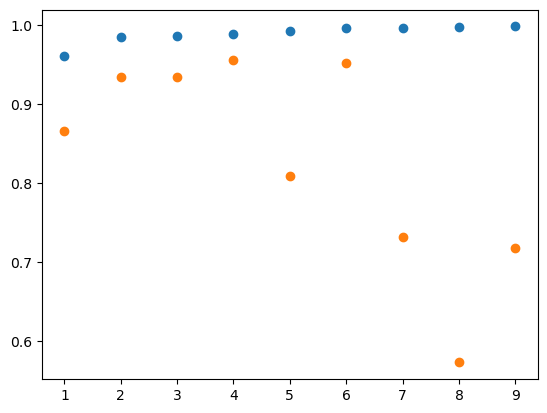

In [279]:
plt.scatter(x =range(1,10), y = train_score)
plt.scatter(x =range(1,10), y = test_score)